In [54]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from spectral.specim import SpecimCubeReader, SpecimFullLoader, RGBProcessor, SpecimPartLoader, SpecimCalibrationProcessor
import matplotlib.patches as patches

In [30]:
plt.rcParams["figure.figsize"] = (5,15)

In [3]:
root_folder = "/media/vytas/My Book 4TB/ICAERUS"
cube_path = os.path.join(root_folder, "miskai-sveikas-2023-05-09/sveikas_miskas_fl1_20230509_154834/sveikas_miskas_fl1_20230509_154834_radiance.dat")

In [14]:
cr = SpecimCubeReader(cube_path)
cube = SpecimFullLoader(cr.metadata)
cube.load()
cube.data.shape

/home/vytas/.local/share/virtualenvs/hyperspectral-o2Ec3W7p/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [26]:
rgb = RGBProcessor(cr.wavelength)
data_rgb = rgb.process(cube.data).astype("uint8")
data_rgb.shape

(6510, 1024, 3)

In [59]:
c1 = [[5656, 763], [5672, 776]]
c2 = [[5441, 719], [5502, 765]]
c3 = [[5294, 765], [5328, 789]]
ca1 = [5656, 5672, 763, 776]
ca2 = [5441, 5502, 719, 765]
ca3 = [5294, 5328, 765, 789]
carpets = [c1, c2, c3]
cuts = [ca1, ca2, ca3]
reflections = [5, 10, 40]

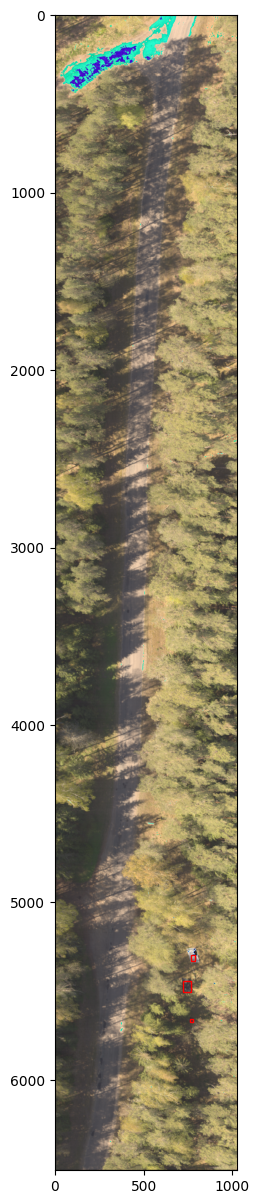

In [52]:
fig, ax = plt.subplots()

ax.imshow(data_rgb)
for c in carpets:
    rect = patches.Rectangle((c[0][1], c[0][0]), c[1][1] - c[0][1], c[1][0] - c[0][0], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()

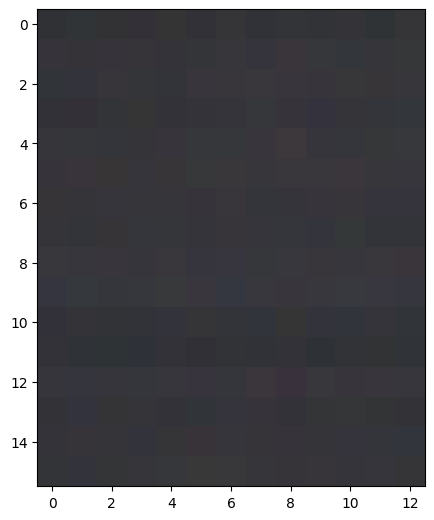

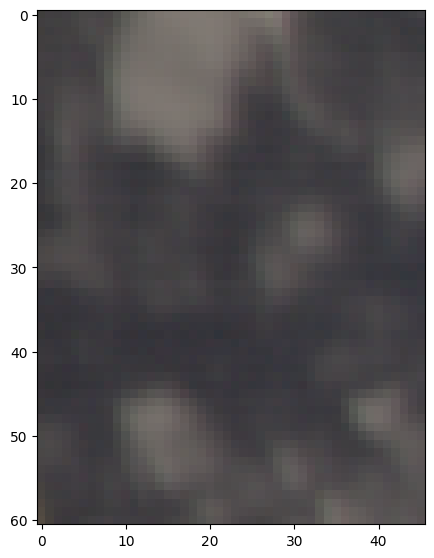

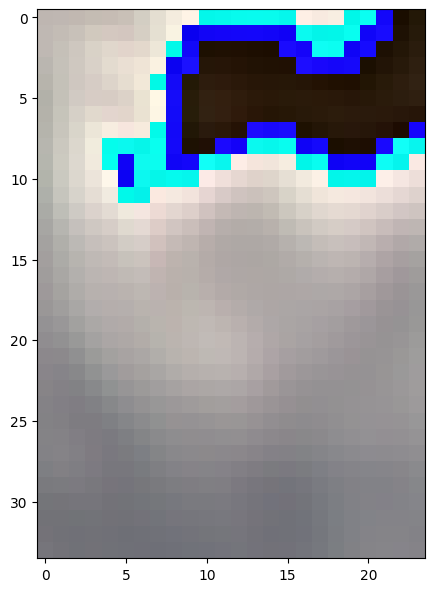

In [53]:
for c in carpets:
    plt.imshow(data_rgb[c[0][0]:c[1][0], c[0][1]:c[1][1], :])
    plt.show()

In [61]:
# calibration
part_loader = SpecimPartLoader(cr.metadata)
part_loader.load(cuts)
calibrator = SpecimCalibrationProcessor(part_loader.data, reflections, cr.wavelength)